## Day 3- ARIMA,SARIMAX

#### Youtube link : https://www.youtube.com/watch?v=NzSyQcJ9NeE&t=2599s

Data set Required : https://raw.githubusercontent.com/krishnaik06/Live-Time-Series/main/airline_passengers.csv

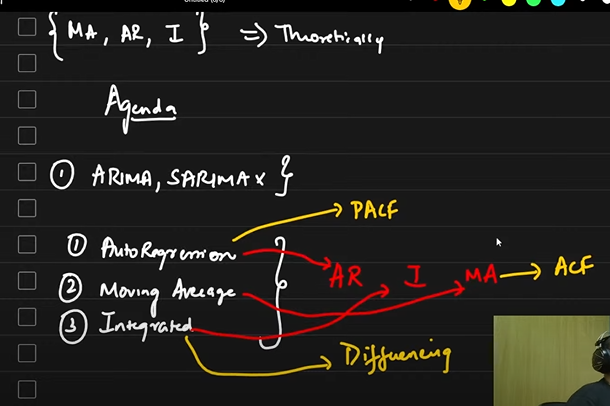


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sms

In [3]:
df_airline = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Live-Time-Series/main/airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.tail(2)

,Month,Thousands of Passengers
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
df_airline.dropna(axis=0, inplace=True)

In [7]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [12]:
df_airline.dtypes

Month                       object
Thousands of Passengers    float64
dtype: object

In [13]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [14]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [15]:
df_airline.dtypes

Month                      datetime64[ns]
Thousands of Passengers           float64
dtype: object

In [16]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [17]:
df_airline.set_index('Month',inplace=True)

In [18]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

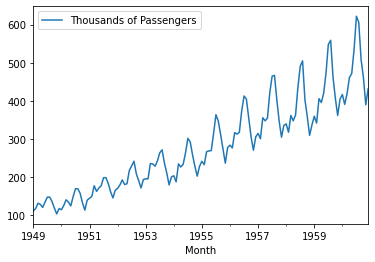

In [21]:
df_airline.plot() 
# looks like seasonal graph and not sationar

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test()

## Pending